# Pryngles module: stars

In [2]:
from pryngles import *

## External modules

In [3]:
sci=Science
print_df=Misc.print_df

## Star Class

In [4]:
class StarDefaults(object):
    """
    These are the default attributes for bodies of the kind 'Star'.
    
    DEVELOPER:
        You may add new attributes as the model gets more complex.
        Please document properly each attribute.

    """
    orbit=dict(
        m=1,
    )
    physics=dict(
        radius=1,
        prot=1,
        i=0,#Inclination of the rotational axis
        roll=0,
        alpha=0,#Zero meridian
        t0=0,
    )
    optics=dict(
        nspangles=1000,
        limb_coeffs=[],
    )

In [9]:
BODY_KINDS+=["Star"]
class Star(Body):
    """A star.

    Initialization attributes:
        
        primary: Class Body, default = None:
            Object in the center of the orbit of the star for specification purposes.
            If None the object is the center of the orbit specification for other objects.
        
        orbit:

            These attributes should be compatible with rebound.

            m: float [um], default = 1: 
                Mass of the star. It should be different than zero.

        physics:

            radius: float [ul], default = 1:
                Radius of the star.

            prot: float [ut], default = 1:
                Period of rotation of the star.
                
            i: float [rad], default = 0:
                Inclination of the ring with respect to the ecliptic plane.

            roll: float [rad], default = 0:
                Roll angle.  This is the angle with respect to ecliptic x-axis in which 
                the normal to the ring plane is rotated.
                
            alpha_equ: float [rad], default = 0:
                Longitude of the zero meridian of the object.
                
            t0: float [ut], default = 0:
                Initial time for zero meridian.

        optics:

            limb_coeffs: list [adimensional], default = []
                List of limb darkening fit coefficients.  See Science.calc_limbdarkening.
                
                Models in: https://pages.jh.edu/~dsing3/David_Sing/Limb_Darkening.html
                Coefficients available at: https://pages.jh.edu/~dsing3/LDfiles/LDCs.CoRot.Table1.txt

            nspangles: int, default = 1000:

                Number of spangles on which the star will be discretized.

    Derived attributes:
    
        physics:
            
            wrot: float [rad/ut]:
                Rotational angular velocity.
                
            n_equ: array(3):
                Rotational axis vector.
    
    Methods:
    
        update_body(**pars):

            This method compute some derived attributes like.

    Notes:

        See Body class documentation.
    
    """
    def __init__(self,
                 primary=None,
                 orbit=StarDefaults.orbit,
                 physics=StarDefaults.physics,
                 optics=StarDefaults.optics
                ):
        
        
        #Instantiate object with basic properties
        Body.__init__(self,StarDefaults,"Star",primary,orbit,physics,optics)

        #Check primary
        if self.primary is not None:
            if self.primary.kind!="Star":
                raise ValueError(f"Only another Star can be the primary of a Star")
                
        #Update properties
        self.update_body(**self.__dict__)
        
    def update_body(self,**pars):
        Body.update_body(self,**pars)
        
        #Update physics
        
        #Rotational angular velocity
        self.physics.wrot=2*np.pi/self.physics.prot
        
        #Rotation axis:
        self.physics.n_equ=sci.cartesian([1,self.physics.roll,90*Consts.deg-self.physics.i])

In [10]:
if IN_JUPYTER:
    def test_star(self):
        S=Star()
        print(S.physics)
        print(S.hash)
        
        #Check derived properties
        self.assertEqual(np.isclose([S.physics.wrot],
                                    [2*np.pi/StarDefaults.physics["prot"]],
                                    rtol=1e-7),
                         [True]*1)
        
        S.update_body(physics=dict(m=2))
        print(S.physics)
        
        #Check exception: primary could not be different from None or Body
        self.assertRaises(AssertionError,lambda:Star(primary="Nada"))
        
    class Test(unittest.TestCase):pass    
    Test.test_star=test_star
    unittest.main(argv=['first-arg-is-ignored'],exit=False)

.

{'radius': 1, 'prot': 1, 'i': 0, 'roll': 0, 'alpha': 0, 't0': 0, 'wrot': 6.283185307179586, 'n_equ': array([6.123234e-17, 0.000000e+00, 1.000000e+00])}
8780987249809
{'radius': 1, 'prot': 1, 'i': 0, 'roll': 0, 'alpha': 0, 't0': 0, 'wrot': 6.283185307179586, 'n_equ': array([6.123234e-17, 0.000000e+00, 1.000000e+00]), 'm': 2}



----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


In [14]:
def spangle_body(self,seed=0):
    """
    Spangle the surface of the star
    """
    
    #Create spangler
    self.sp=Spangler(
        nspangles=self.optics.nspangles,
        body_hash=self.hash,
        spangle_type=STAR_SPANGLE,
        n_equ=self.physics.n_equ,
        alpha_equ=self.physics.alpha,
        w_equ=self.physics.wrot,
        t0_equ=self.physics.t0,
    )
    
    #Populate spangler
    self.sp.populate_spangler(
        scale=self.physics.radius,
        seed=seed,
        geometry="sphere",
        preset=True
    )

Star.spangle_body=spangle_body

Rotation axis: [0. 1. 0.] [-1.000000e+00  0.000000e+00  6.123234e-17] [6.123234e-17 0.000000e+00 1.000000e+00]
Rotation axis: [1 0 0] [0. 1. 0.] [0. 0. 1.]
Rotation axis: [1 0 0] [0. 1. 0.] [0. 0. 1.]
Populating spangler from preset for sphere
Reading preset data from /Users/jorgezuluagacallejas/Dropbox/MiInvestigacion/PapersEnProceso/Exorings/pryngles/src/pryngles/data/sampler_presets/sample_sphere_N_1200.pkl
Purging sample
Already purged.
Rotation axis: [1 0 0] [0. 1. 0.] [0. 0. 1.]
Rotation axis: [1 0 0] [0. 1. 0.] [0. 0. 1.]


,body_hash,type,dim,scale,center_ecl,x_ecl,y_ecl,z_ecl,r_ecl,q_ecl,f_ecl,ns_ecl,x_obs,y_obs,z_obs,r_obs,q_obs,f_obs,ns_obs,x_luz,y_luz,z_luz,r_luz,q_luz,f_luz,ns_luz,n_equ,alpha_equ,center_equ,x_equ,y_equ,z_equ,r_equ,q_equ,f_equ,ns_equ,w,t0,asp,dsp,albedo_gray_normal,tau_gray_optical,unset,visible,shadow,illuminated,transit,indirect,occult,emit,hidden
1195,8780952634703,3,3,1,"[0, 0, 0]",0.095060,0.076859,0.992500,1.0,0.679922,1.448245,"[0.09506008459842667, 0.07685915896065787, 0.9925000000000002]",0.095060,0.076859,0.992500,1.0,0.679922,1.448245,"[0.09506008459842667, 0.07685915896065787, 0.9925000000000002]",0.095060,0.076859,0.992500,1.0,0.679922,1.448245,"[0.09506008459842667, 0.07685915896065787, 0.9925000000000002]","[6.123233995736766e-17, 0.0, 1.0]",0,"[0, 0, 0]",0.076859,-0.095060,0.992500,1.0,5.392311,1.448245,"[0.07685915896065787, -0.09506008459842662, 0.9925000000000002]",0,0,0.010472,0.11547,1,0.0,0,1,0,1,0,0,0,0,0
1196,8780952634703,3,3,1,"[0, 0, 0]",-0.107649,0.006651,0.994167,1.0,3.079885,1.462731,"[-0.10764943229928231, 0.006651211508497457, 0.9941666666666669]",-0.107649,0.006651,0.994167,1.0,3.079885,1.462731,"[-0.10764943229928231, 0.006651211508497457, 0.9941666666666669]",-0.107649,0.006651,0.994167,1.0,3.079885,1.462731,"[-0.10764943229928231, 0.006651211508497457, 0.9941666666666669]","[6.123233995736766e-17, 0.0, 1.0]",0,"[0, 0, 0]",0.006651,0.107649,0.994167,1.0,1.509089,1.462731,"[0.006651211508497457, 0.10764943229928237, 0.9941666666666669]",0,0,0.010472,0.11547,1,0.0,0,1,0,1,0,0,0,0,0
1197,8780952634703,3,3,1,"[0, 0, 0]",0.063315,-0.065629,0.995833,1.0,5.479848,1.479478,"[0.06331540620133429, -0.06562874034888867, 0.9958333333333336]",0.063315,-0.065629,0.995833,1.0,5.479848,1.479478,"[0.06331540620133429, -0.06562874034888867, 0.9958333333333336]",0.063315,-0.065629,0.995833,1.0,5.479848,1.479478,"[0.06331540620133429, -0.06562874034888867, 0.9958333333333336]","[6.123233995736766e-17, 0.0, 1.0]",0,"[0, 0, 0]",-0.065629,-0.063315,0.995833,1.0,3.909052,1.479478,"[-0.06562874034888867, -0.06331540620133423, 0.9958333333333336]",0,0,0.010472,0.11547,1,0.0,0,1,0,1,0,0,0,0,0
1198,8780952634703,3,3,1,"[0, 0, 0]",-0.001825,0.070643,0.997500,1.0,1.596626,1.500071,"[-0.0018251171400027553, 0.07064289736006851, 0.9975]",-0.001825,0.070643,0.997500,1.0,1.596626,1.500071,"[-0.0018251171400027553, 0.07064289736006851, 0.9975]",-0.001825,0.070643,0.997500,1.0,1.596626,1.500071,"[-0.0018251171400027553, 0.07064289736006851, 0.9975]","[6.123233995736766e-17, 0.0, 1.0]",0,"[0, 0, 0]",0.070643,0.001825,0.997500,1.0,0.025830,1.500071,"[0.07064289736006851, 0.0018251171400028164, 0.9975]",0,0,0.010472,0.11547,1,0.0,0,1,0,1,0,0,0,0,0
1199,8780952634703,3,3,1,"[0, 0, 0]",-0.026785,-0.030799,0.999167,1.0,3.996590,1.529969,"[-0.026784519770686445, -0.03079872924124944, 0.9991666666666668]",-0.026785,-0.030799,0.999167,1.0,3.996590,1.529969,"[-0.026784519770686445, -0.03079872924124944, 0.9991666666666668]",-0.026785,-0.030799,0.999167,1.0,3.996590,1.529969,"[-0.026784519770686445, -0.03079872924124944, 0.9991666666666668]","[6.123233995736766e-17, 0.0, 1.0]",0,"[0, 0, 0]",-0.030799,0.026785,0.999167,1.0,2.425793,1.529969,"[-0.03079872924124944, 0.026784519770686507, 0.9991666666666668]",0,0,0.010472,0.11547,1,0.0,0,1,0,1,0,0,0,0,0


<IPython.core.display.Javascript object>


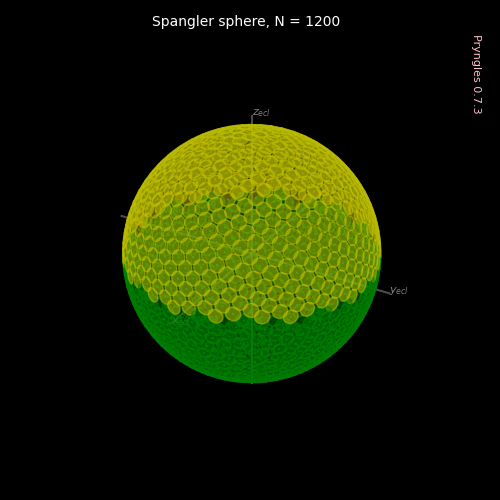

0 [0.0405543139712329, 0.004617341285303808, -0.9991666666666666] 0.057735026918962574 [ 0.04055431  0.00461734 -0.99916667]
1 [-0.057172728612189215, 0.0415334696725048, -0.9975] 0.057735026918962574 [-0.05717273  0.04153347 -0.9975    ]
2 [0.018197923221797238, -0.08935775183293174, -0.9958333333333333] 0.057735026918962574 [ 0.01819792 -0.08935775 -0.99583333]
3 [0.055518986758939216, 0.09246772949602318, -0.9941666666666666] 0.057735026918962574 [ 0.05551899  0.09246773 -0.99416667]
4 [-0.11719447141607243, -0.03477363756507673, -0.9925] 0.057735026918962574 [-0.11719447 -0.03477364 -0.9925    ]
5 [0.12145351177439062, -0.05914685142273781, -0.9908333333333333] 0.057735026918962574 [ 0.12145351 -0.05914685 -0.99083333]
6 [-0.053901477907746055, 0.1365428000112651, -0.9891666666666666] 0.057735026918962574 [-0.05390148  0.1365428  -0.98916667]
7 [-0.05635759979828865, -0.14719908608743426, -0.9875] 0.057735026918962574 [-0.0563576  -0.14719909 -0.9875    ]
8 [0.1500301295640698, 0.0

330 [0.8158394907601837, 0.3642186580499683, -0.44916666666666666] 0.057735026918962574 [ 0.81583949  0.36421866 -0.44916667]
331 [-0.8483938664941366, 0.28279249865427636, -0.44749999999999995] 0.057735026918962574 [-0.84839387  0.2827925  -0.4475    ]
332 [0.4349599650195489, -0.7823314308648743, -0.4458333333333333] 0.057735026918962574 [ 0.43495997 -0.78233143 -0.44583333]
333 [0.20792354610798483, 0.8714836608887759, -0.4441666666666666] 0.057735026918962574 [ 0.20792355  0.87148366 -0.44416667]
334 [-0.7426777885787653, -0.5026166057262282, -0.44249999999999995] 0.057735026918962574 [-0.74267779 -0.50261661 -0.4425    ]
335 [0.8879517906253214, -0.13117770293577952, -0.44083333333333335] 0.057735026918962574 [ 0.88795179 -0.1311777  -0.44083333]
336 [-0.5666538270245512, 0.6971628785350801, -0.43916666666666654] 0.057735026918962574 [-0.56665383  0.69716288 -0.43916667]
337 [-0.05314189610564215, -0.8976467506086664, -0.4375] 0.057735026918962574 [-0.0531419  -0.89764675 -0.4375 

588 [-0.03042622238324573, 0.9993532327862726, -0.01916666666666655] 0.057735026918962574 [-0.03042622  0.99935323 -0.01916667]
589 [-0.652638007953902, -0.7574677422662714, -0.01749999999999992] 0.057735026918962574 [-0.65263801 -0.75746774 -0.0175    ]
590 [0.9929246523731107, 0.11768576917067193, -0.015833333333333317] 0.057735026918962574 [ 0.99292465  0.11768577 -0.01583333]
591 [-0.811667627801854, 0.5839477438384933, -0.0141666666666665] 0.057735026918962574 [-0.81166763  0.58394774 -0.01416667]
592 [0.20405195001272872, -0.9788802540127177, -0.012499999999999968] 0.057735026918962574 [ 0.20405195 -0.97888025 -0.0125    ]
593 [0.5107724863288139, 0.8596476639288742, -0.010833333333333282] 0.057735026918962574 [ 0.51077249  0.85964766 -0.01083333]
594 [-0.9573273455956592, -0.2888603911874928, -0.009166666666666597] 0.057735026918962574 [-0.95732735 -0.28886039 -0.00916667]
595 [0.9010382966309856, -0.43367469145009174, -0.007500000000000007] 0.057735026918962574 [ 0.9010383  -0.

736 [0.21727948919527057, -0.9492277774986583, 0.22750000000000004] 0.057735026918962574 [ 0.21727949 -0.94922778  0.2275    ]
737 [0.4807859490845603, 0.8463613353950826, 0.2291666666666667] 0.057735026918962574 [0.48078595 0.84636134 0.22916667]
738 [-0.9258506544471518, -0.29919314477775544, 0.2308333333333335] 0.057735026918962574 [-0.92585065 -0.29919314  0.23083333]
739 [0.8844345928142702, -0.4046222942862344, 0.2325000000000001] 0.057735026918962574 [ 0.88443459 -0.40462229  0.2325    ]
740 [-0.37868033468163703, 0.8954145276617, 0.23416666666666688] 0.057735026918962574 [-0.37868033  0.89541453  0.23416667]
741 [-0.3254817691840619, -0.9156660181625732, 0.23583333333333337] 0.057735026918962574 [-0.32548177 -0.91566602  0.23583333]
742 [0.8581649767780619, 0.45513363161988857, 0.2375] 0.057735026918962574 [0.85816498 0.45513363 0.2375    ]
743 [-0.9398266105044912, 0.24397796569197544, 0.2391666666666668] 0.057735026918962574 [-0.93982661  0.24397797  0.23916667]
744 [0.527970

1008 [-0.30948639741077055, -0.6638404492345467, 0.6808333333333334] 0.057735026918962574 [-0.3094864  -0.66384045  0.68083333]
1009 [0.6751889652711526, 0.2798456917232606, 0.6825000000000001] 0.057735026918962574 [0.67518897 0.27984569 0.6825    ]
1010 [-0.6854303666321946, 0.2492010929363619, 0.6841666666666668] 0.057735026918962574 [-0.68543037  0.24920109  0.68416667]
1011 [0.33635783367074057, -0.6453650491134573, 0.6858333333333335] 0.057735026918962574 [ 0.33635783 -0.64536505  0.68583333]
1012 [0.18751153049585176, 0.7015576782639495, 0.6875] 0.057735026918962574 [0.18751153 0.70155768 0.6875    ]
1013 [-0.6108273787151849, -0.3897938159687652, 0.6891666666666667] 0.057735026918962574 [-0.61082738 -0.38979382  0.68916667]
1014 [0.7121421112399143, -0.12491164459053783, 0.6908333333333334] 0.057735026918962574 [ 0.71214211 -0.12491164  0.69083333]
1015 [-0.4397618342993782, 0.5718857220578654, 0.6925000000000001] 0.057735026918962574 [-0.43976183  0.57188572  0.6925    ]
1016 [

.
----------------------------------------------------------------------
Ran 1 test in 1.287s

OK


In [20]:
if IN_JUPYTER:
    def test_sp(self):
        
        Verbose.VERBOSITY=1
        
        S=Star(optics=dict(nspangles=1270))
        S.spangle_body()
        print_df(S.sp.data.tail())
        S.sp.plot3d()
        
        Verbose.VERBOSITY=0
        
    class Test(unittest.TestCase):pass    
    Test.test_sp=test_sp
    unittest.main(argv=['first-arg-is-ignored'],exit=False)

--End--